In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('new_pre.csv')
df

,Unnamed: 0,HAD_ATTACK,HAD_HEARTDIS,HAD_ASTHMA,KIDNEY_DIS,HAD_DIABETES,DIFFWALK,SMOKING100,DRINKSIN_30D,DRINK_FREQ30D,PHYSICH_STATUS,MENTALH_STATUS,HEALTH_INSU,PHYSIC_ACT,SEX,AGE>65,HEAVY_DRINKERS,Adult,WEIGHT_KG
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1,88.450440
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1,80.739376
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,98.429464
3,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,66.224432
4,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,90.718400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,184074,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,71.667536
184075,184075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,58.966960
184076,184076,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,90.718400
184077,184077,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,77.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,58.059776


In [4]:
df.isnull().sum()

Unnamed: 0        0
HAD_ATTACK        0
HAD_HEARTDIS      0
HAD_ASTHMA        0
KIDNEY_DIS        0
HAD_DIABETES      0
DIFFWALK          0
SMOKING100        0
DRINKSIN_30D      0
DRINK_FREQ30D     0
PHYSICH_STATUS    0
MENTALH_STATUS    0
HEALTH_INSU       0
PHYSIC_ACT        0
SEX               0
AGE>65            0
HEAVY_DRINKERS    0
Adult             0
WEIGHT_KG         0
dtype: int64

In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df.nunique().reset_index().rename(columns={'index':'column', 0:'unique count'})

,column,unique count
0,HAD_ATTACK,2
1,HAD_HEARTDIS,2
2,HAD_ASTHMA,2
3,KIDNEY_DIS,2
4,HAD_DIABETES,2
5,DIFFWALK,2
6,SMOKING100,2
7,DRINKSIN_30D,49
8,DRINK_FREQ30D,47
9,PHYSICH_STATUS,2


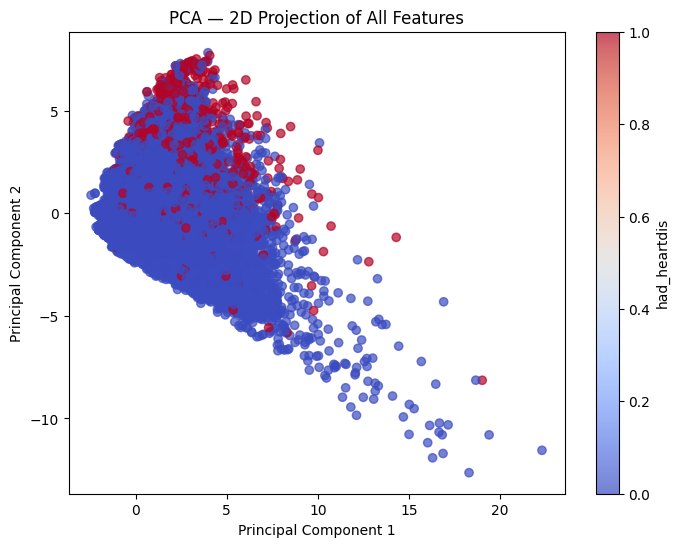

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
X = df.drop(columns=['HAD_HEARTDIS'])
y = df['HAD_HEARTDIS']

# Standardize numeric features
X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=['float64', 'int64']))

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of 2D projection
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA — 2D Projection of All Features')
plt.colorbar(label='had_heartdis')

Interpretation of my PCA Plot

Blue points (0) = patients without heart disease
Red points (1) = patients with heart disease

The points are mostly overlapping, especially in the dense upper-left region →
This means that your current features are not linearly separable.
PCA captures linear patterns only, so the two classes share similar projections.

However, the red (positive) points seem slightly concentrated at the top region, indicating some directional pattern — meaning certain feature combinations might carry useful signals.

Therefore, a linear model (like Logistic Regression) may not perform as strongly, while nonlinear models (like CatBoost, XGBoost, RandomForest, or MLP) could learn better class boundaries.

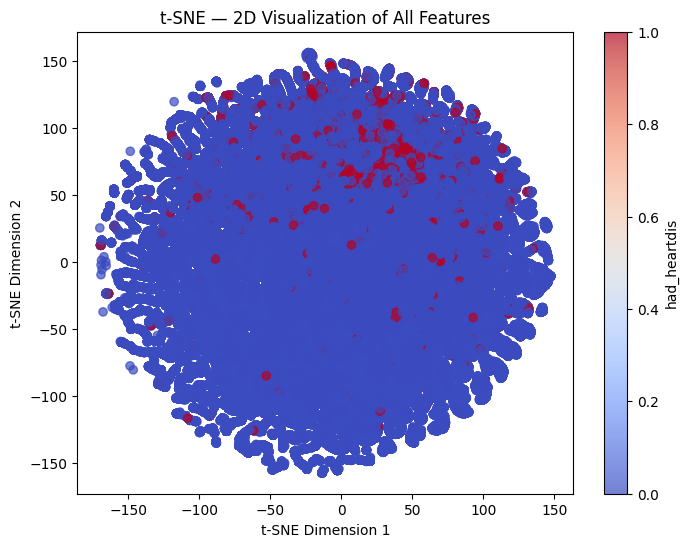

In [8]:
from sklearn.manifold import TSNE

# Run t-SNE on standardized features
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE — 2D Visualization of All Features')
plt.colorbar(label='had_heartdis')
plt.show()


In [9]:
cat_cols2 = [col for col in df.columns if df[col].nunique() < 10]
num_cols2 = [col for col in df.columns if df[col].nunique() >= 10]

print(cat_cols2)
print(num_cols2)

['HAD_ATTACK', 'HAD_HEARTDIS', 'HAD_ASTHMA', 'KIDNEY_DIS', 'HAD_DIABETES', 'DIFFWALK', 'SMOKING100', 'PHYSICH_STATUS', 'MENTALH_STATUS', 'HEALTH_INSU', 'PHYSIC_ACT', 'SEX', 'AGE>65', 'HEAVY_DRINKERS', 'Adult']
['DRINKSIN_30D', 'DRINK_FREQ30D', 'WEIGHT_KG']


In [10]:
df[num_cols2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DRINKSIN_30D,184079.0,2.251609,2.331794,0.0000,1.0000,2.00000,3.00000,76.00000
DRINK_FREQ30D,184079.0,1.898500,8.237418,0.0000,0.0000,0.00000,1.00000,99.00000
WEIGHT_KG,184079.0,83.564694,20.531724,22.6796,68.0388,81.64656,95.25432,285.76296


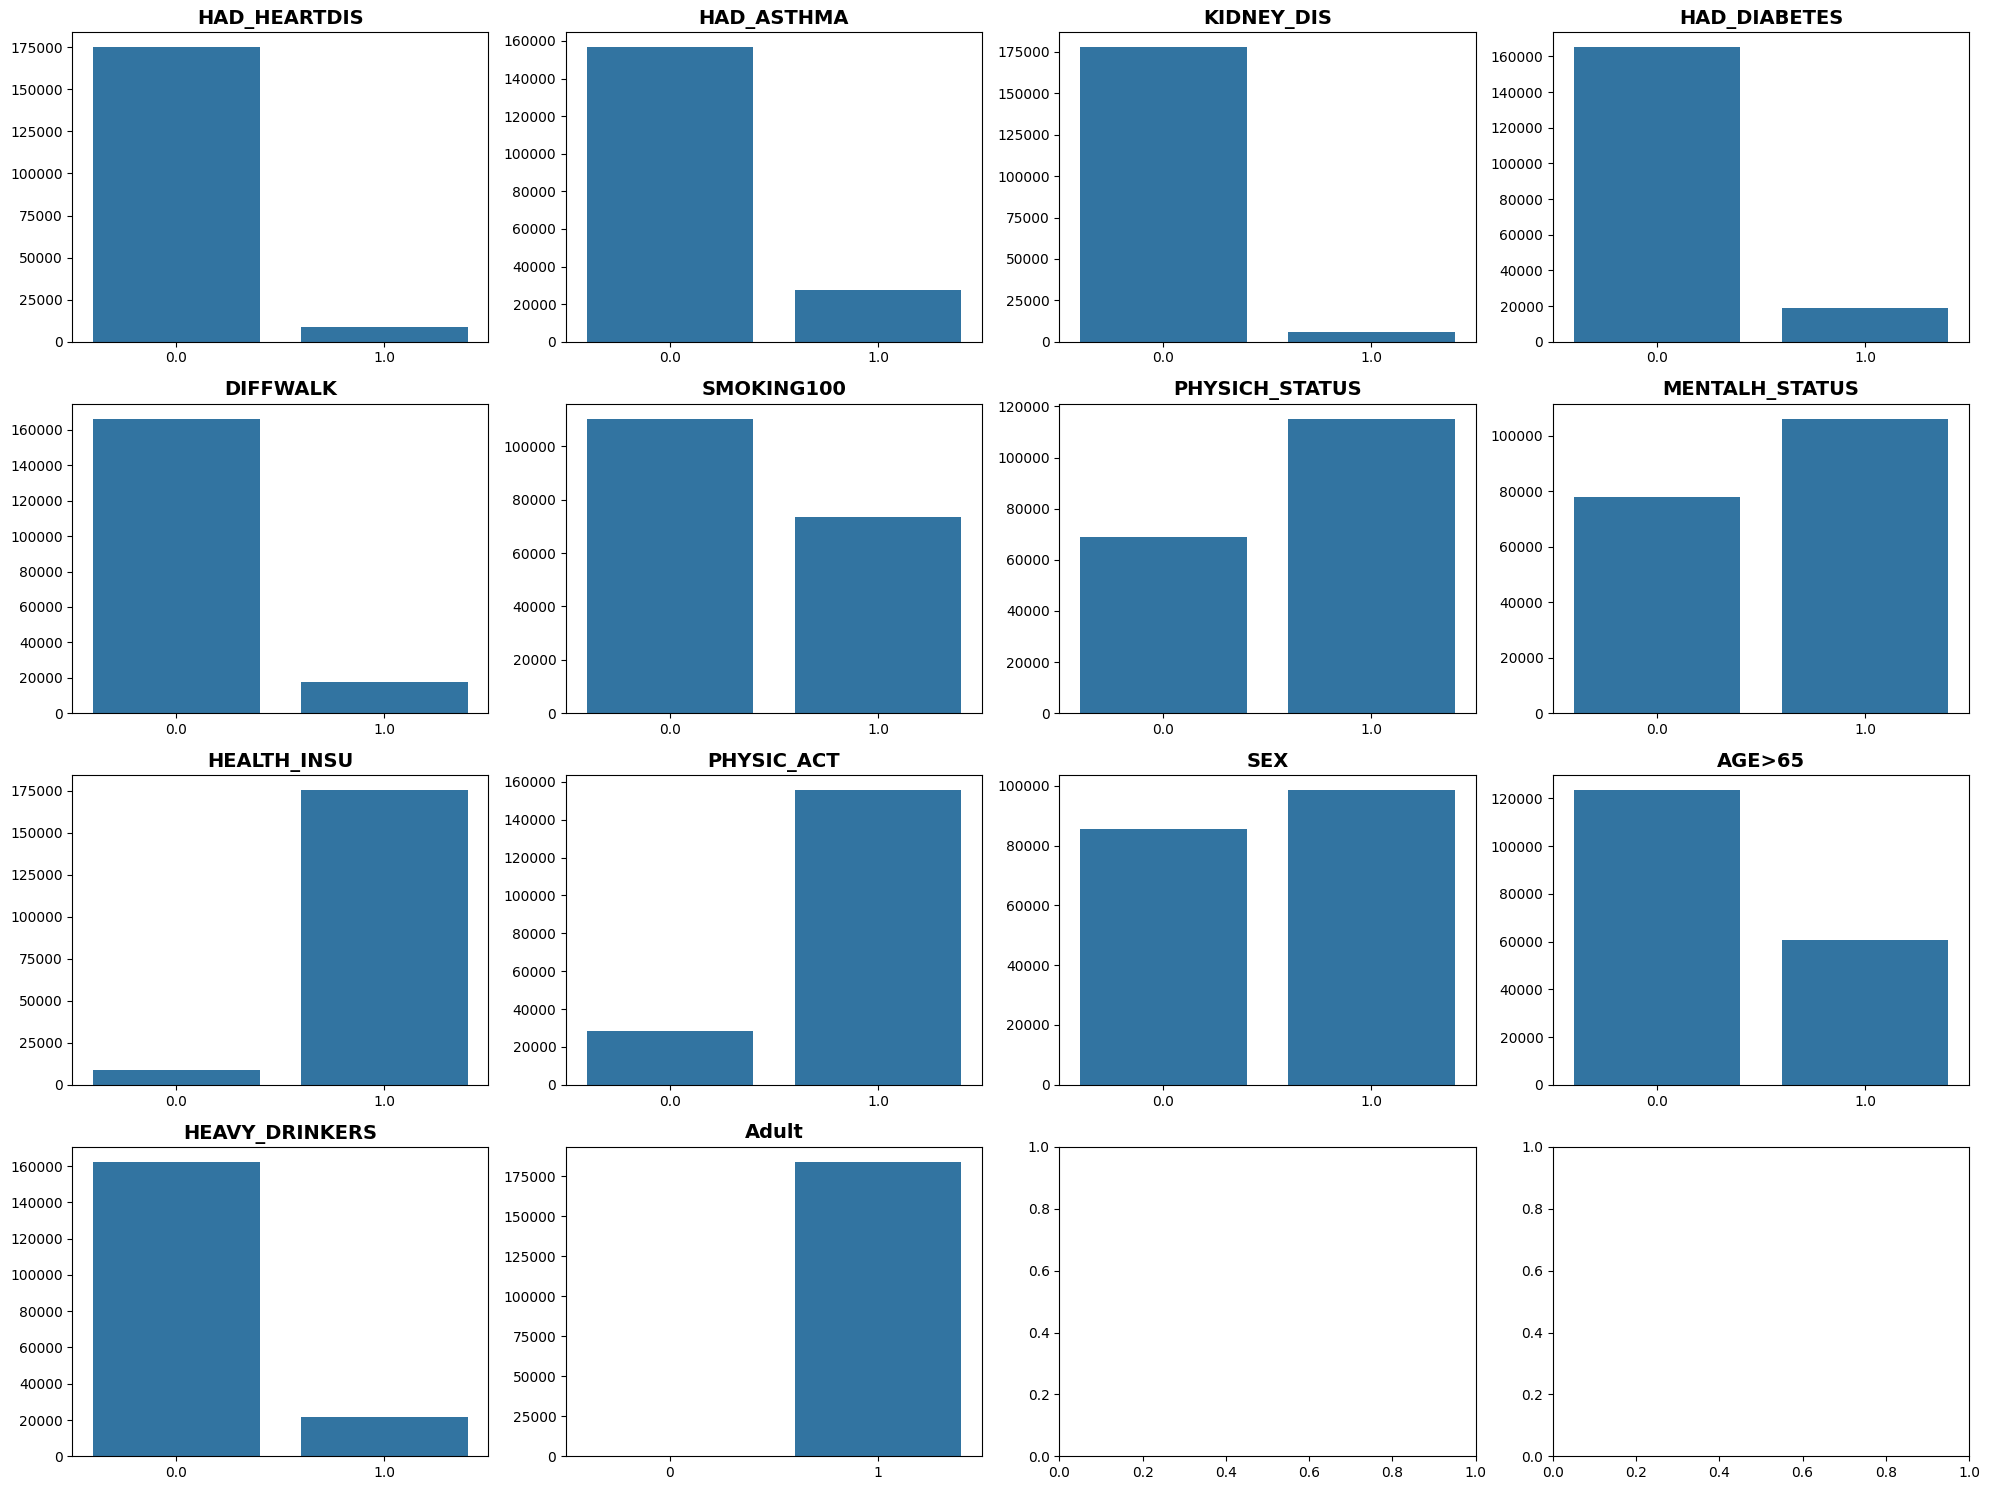

In [19]:


cat_cols = ['HAD_HEARTDIS','HAD_ASTHMA','KIDNEY_DIS','HAD_DIABETES',
            'DIFFWALK','SMOKING100','PHYSICH_STATUS','MENTALH_STATUS','HEALTH_INSU',
            'PHYSIC_ACT','SEX','AGE>65','HEAVY_DRINKERS','Adult']

fig, axes = plt.subplots(4,4, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


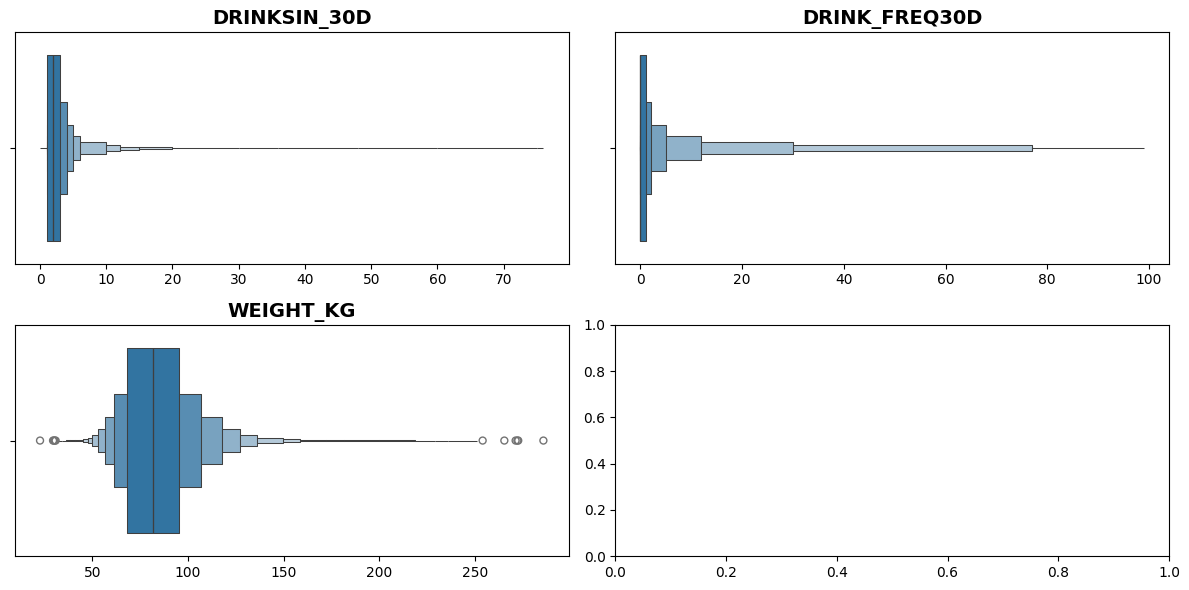

In [12]:
num_cols=['DRINKSIN_30D', 'DRINK_FREQ30D', 'WEIGHT_KG']

fig, axes = plt.subplots(2,2, figsize=(12,6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxenplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


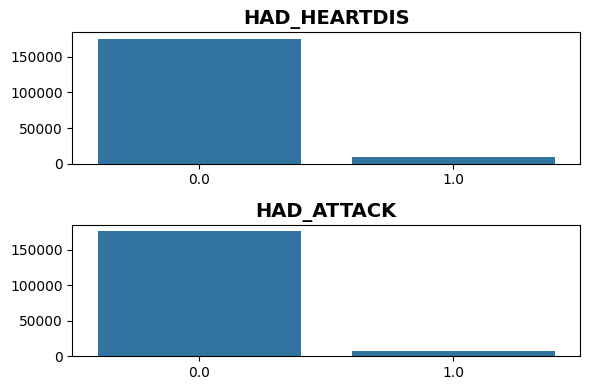

In [13]:


target_column=['HAD_HEARTDIS','HAD_ATTACK']

fig, axes = plt.subplots(2, figsize=(6,4))
axes = axes.flatten()

for i, col in enumerate(target_column):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


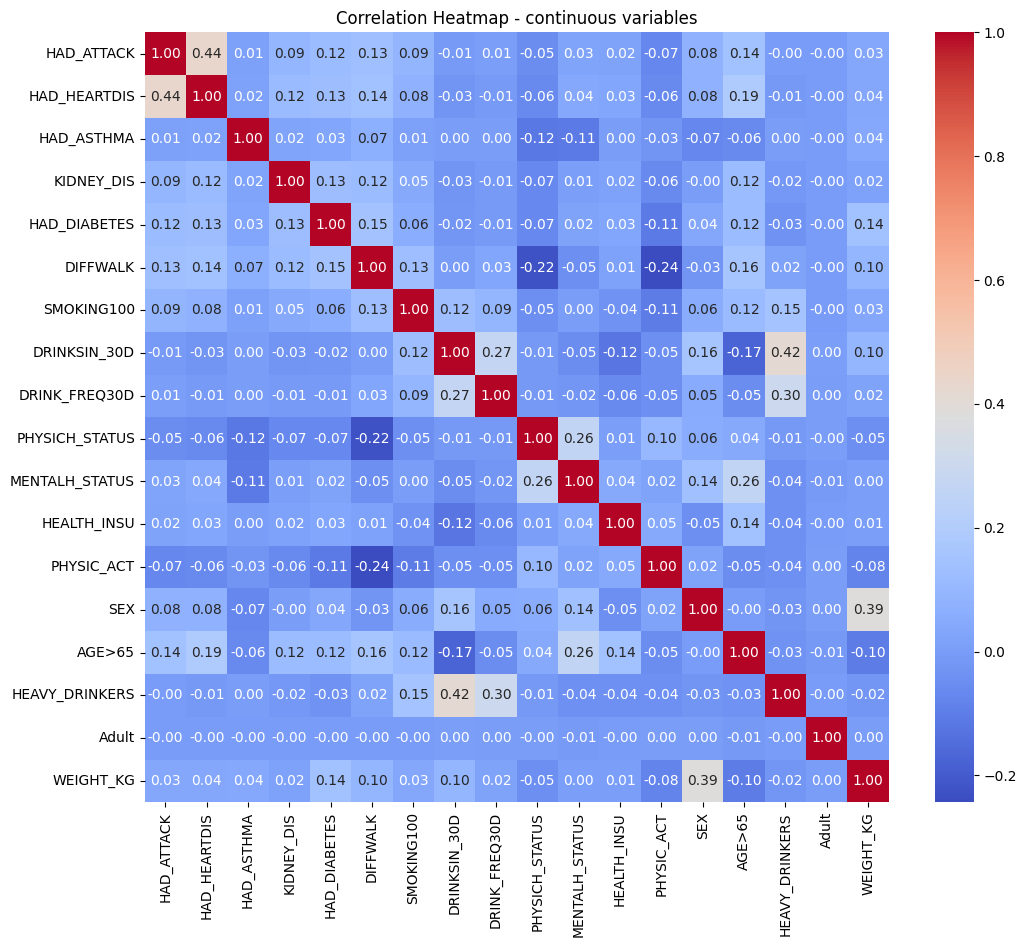

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - continuous variables")
plt.show()

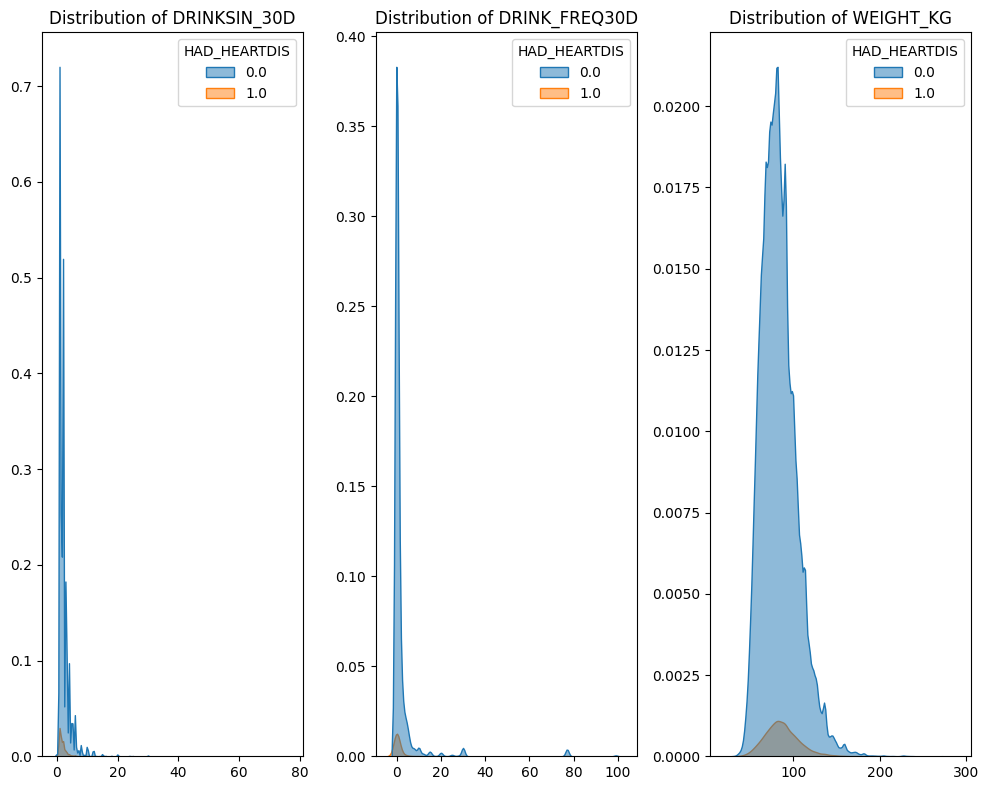

In [15]:


num_cols = ['DRINKSIN_30D','DRINK_FREQ30D','WEIGHT_KG']

plt.figure(figsize=(10,8))

for i,col in enumerate(num_cols):

    plt.subplot(1,3,i+1)
    sns.kdeplot(data=df, x=col, hue='HAD_HEARTDIS', fill=True, alpha=0.5)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = ['HAD_HEARTDIS','HAD_ASTHMA','KIDNEY_DIS','HAD_DIABETES',
            'DIFFWALK','SMOKING100','PHYSICH_STATUS','MENTALH_STATUS','HEALTH_INSU',
            'PHYSIC_ACT','SEX','AGE>65','HEAVY_DRINKERS','Adult']   # replace with your columns
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))


In [ ]:
X,y = df.drop('HAD_ATTACK', axis=1), df['HAD_ATTACK']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state =42)

In [ ]:
features = ['HAD_HEARTDIS'
    'HAD_ASTHMA','KIDNEY_DIS','HAD_DIABETES',
    'DIFFWALK','SMOKING100','PHYSICH_STATUS','MENTALH_STATUS',
    'HEALTH_INSU','PHYSIC_ACT','SEX','AGE>65','HEAVY_DRINKERS'
]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

for feat,imp in sorted(zip(features,importances), key=lambda x:x[1], reverse=True):
    print(feat,imp)

PHYSICH_STATUS 0.09506171035396928
MENTALH_STATUS 0.06801441432108576
PHYSIC_ACT 0.030267342872992996
HAD_HEARTDISHAD_ASTHMA 0.026868081641490224
DIFFWALK 0.02533302886792844
AGE>65 0.024352273949817923
HEAVY_DRINKERS 0.023498334730770076
HAD_DIABETES 0.022983908020316156
HEALTH_INSU 0.022358542436102215
SMOKING100 0.02007688448664027
KIDNEY_DIS 0.01921419591172112
SEX 0.006747181827098768


In [ ]:
features = [
    'HAD_ASTHMA','KIDNEY_DIS','HAD_DIABETES',
    'DIFFWALK','SMOKING100','PHYSICH_STATUS','MENTALH_STATUS',
    'HEALTH_INSU','PHYSIC_ACT','SEX','AGE>65','HEAVY_DRINKERS'
]

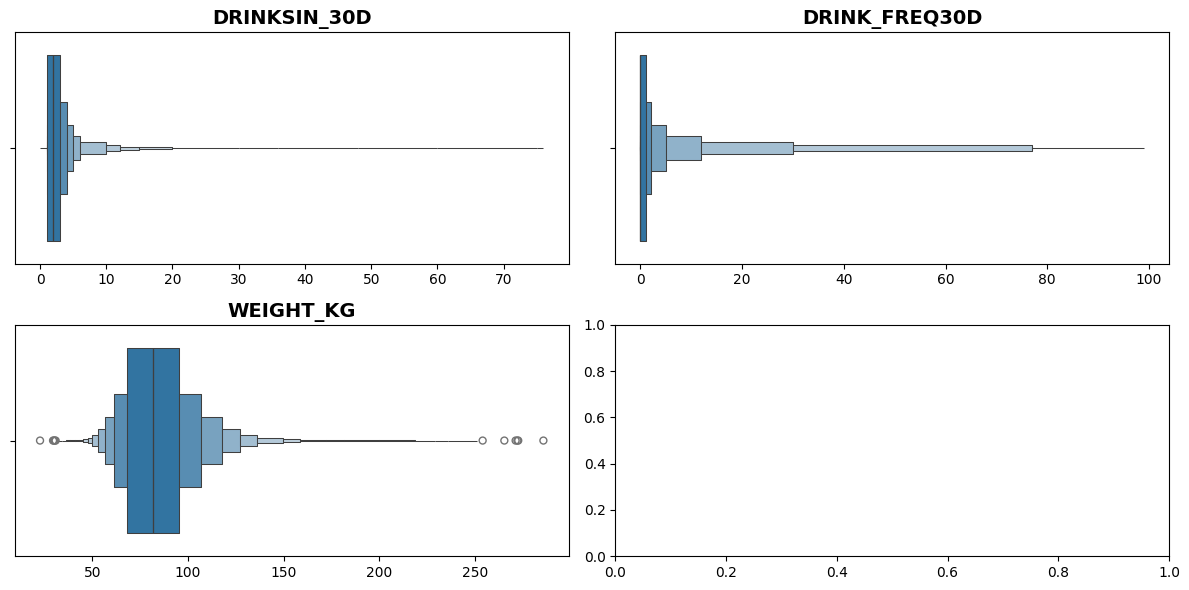

In [ ]:
num_cols=['DRINKSIN_30D', 'DRINK_FREQ30D', 'WEIGHT_KG']

fig, axes = plt.subplots(2,2, figsize=(12,6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxenplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()
